In [3]:
import pandas as pd
import numpy as np
import string
from operator import itemgetter
from datetime import datetime
import networkx as nx
import nxviz as nv
import re
import os
from email.parser import Parser
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Counter
%matplotlib inline
import warnings
from wordcloud import WordCloud

warnings.filterwarnings("ignore")

/Users/itschris/anaconda3/lib/python3.11/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [7]:
file_dir = '/Users/itschris/Desktop/enron/enron_subset.csv'

with open(file_dir, "r") as f:
    data = f.read()

print(data)

file,message
allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 "
allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen

In [8]:
email = Parser().parsestr(data)

# get the body of the email
body = email.get_payload()

print(body)

file,message
allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 "
allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen

In [9]:
# save the body to a file to desktop
with open('/Users/itschris/Desktop/body.txt', 'w') as f:
    f.write(body)

In [11]:
# separate the body into words (tokenize)
words = body.split()

# count the words
word_count = Counter(words)

# create a dataframe from the word count
word_count_df = pd.DataFrame(word_count.items(), columns=['word', 'count'])

# sort the dataframe by count
word_count_df = word_count_df.sort_values(by='count', ascending=False)

In [12]:
# top 30 words
top_words = word_count_df.head(60)

In [13]:
top_words = str(top_words)
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = 'english', 
                min_font_size = 10).generate(top_words)

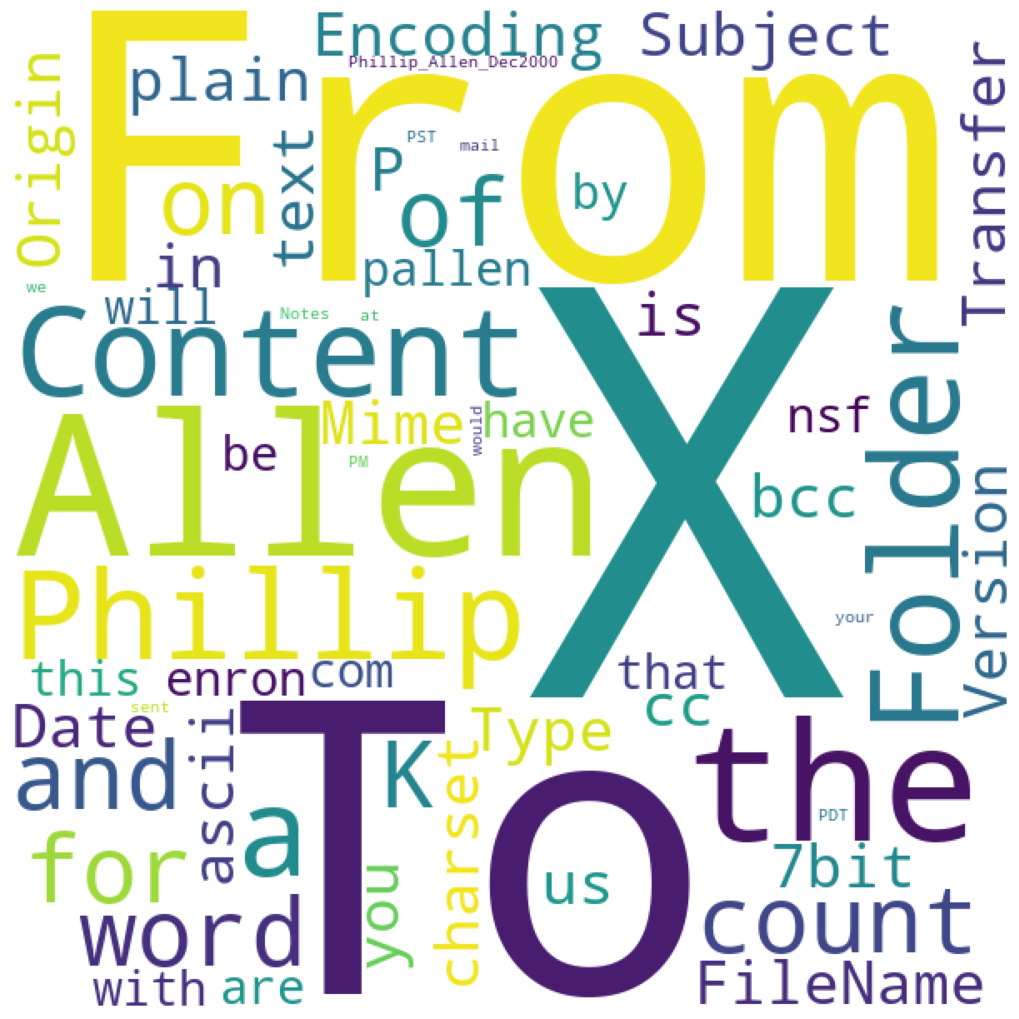

In [14]:
# plot the WordCloud image                        
plt.figure(figsize = (10,10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### EDA analysis

In [ ]:
import ydata_profiling
from ydata_profiling import ProfileReport

In [30]:
enron_df = pd.read_csv("/Users/itschris/Desktop/Pontus-X/repo/PETS-marketplace-adv/data/inputs/enron/enron_subset.csv")

# preprocessing 
def parse_email(content):
    email = Parser().parsestr(content)
    return email.get_payload()

enron_df['email_body'] = enron_df['message'].apply(parse_email)

In [34]:
email_body_df = enron_df.drop(columns=['message'])

email_body_df.head()

file                                         email_body
0     allen-p/_sent_mail/1.                          Here is our forecast\n\n 
1    allen-p/_sent_mail/10.  Traveling to have a business meeting takes the...
2   allen-p/_sent_mail/100.                     test successful.  way to go!!!
3  allen-p/_sent_mail/1000.  Randy,\n\n Can you send me a schedule of the s...
4  allen-p/_sent_mail/1001.                Let's shoot for Tuesday at 11:45.

In [35]:
# create EDA report 
profile = ProfileReport(email_body_df, title="Profiling Report", explorative = True , sensitive=False)  # , tsmode=True)

In [36]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Individual Email Analysis

In [10]:
data.head()

AttributeError: 'str' object has no attribute 'head'